In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# This function is defined only for the case where we are evaluating the solution to the grobner basis for the sudoku. As the polynomials are all linear, in terms of w and equal to 0, the function takes these polynomials as an input and will put every term except for the vertice term to the right. Essentially it solves these determined polynomials.
def extractSolutions(polynomials):
    solutions = {}
    for p in polynomials:
        # De variabele is de enige niet-constante term (bijvoorbeeld x0)
        variable = list(p.variables())[0]
        # De waarde is - de constante term (bijvoorbeeld -(-w^3))
        value = -p.constant_coefficient()
        solutions[variable] = value
    return solutions

In [18]:
#This function creates an Appalonian Network based on hardcoded input inside the function.
def main():
    k = 4 # number of available colors
    n = 43# number of vertices
    R.<w> = PolynomialRing(QQ)
    F.<w> = NumberField(w^(2) + 1) # add the kth cyclotomic polynomial
    R = PolynomialRing(F, n, names=['x{}'.format(i) for i in range(1,n+1)], order='degrevlex')
    x = R.gens()  # x is a tuple containing the variables

    edges = [(1,2),(1,3),(1,41),(1,14),(1,35),(1,5),(1,29),(1,8),(1,23),(1,4),(1,24),(1,13),(1,34),(1,6),(1,40),(1,16),(1,43),(2,3),(2,41),(2,14),(2,36),(2,5),(2,30),(2,9),(2,25),(2,4),(2,26),(2,10),(2,31),(2,7),(2,37),(2,15),(2,42),(3,42),(3,15),(3,38),(3,7),(3,32),(3,11),(3,27),(3,4),(3,28),(3,12),(3,33),(3,6),(3,39),(3,16),(3,43),(4,24),(4,13),(4,22),(4,6),(4,21),(4,12),(4,28),(4,27),(4,11),(4,20),(4,7),(4,19),(4,10),(4,26),(4,25),(4,9),(4,18),(4,5),(4,17),(4,8),(4,23),(5,18),(5,9),(5,30),(5,36),(5,14),(5,35),(5,29),(5,8),(5,17),(6,40),(6,16),(6,39),(6,33),(6,12),(6,21),(6,22),(6,13),(6,34),(7,15),(7,37),(7,31),(7,10),(7,19),(7,20),(7,11),(7,32),(7,38),(8,17),(8,29),(8,23),(9,18),(9,25),(9,30),(10,19),(10,26),(10,31),(11,27),(11,32),(11,20),(12,33),(12,28),(12,21),(13,22),(13,34),(13,24),(14,35),(14,36),(14,41),(15,37),(15,38),(15,42),(16,40),(16,43),(16,39)]
    index = list(range(0,n))
    functions = []
    for i in index:
        functions.append(x[i]^k - 1)
    for edge in edges:
        functions.append(sum([x[edge[0]-1]^(k-1-m) * x[edge[1]-1]^m for m in range(0,k)]))

    substitutionDictionairy = {x[0]: 1,  x[1]: -1, x[2]:w}
    functions = [f.subs(substitutionDictionairy) for f in functions]

    functions.append(x[0]-1)
    functions.append(x[1]+1)
    functions.append(x[2]-w)
    

    I = Ideal(functions)
    G = I.groebner_basis()
    print(list(G))
    number_of_colorings = I.radical().vector_space_dimension()
    print('Number of colorings using at most', k, 'colors: ', number_of_colorings)
    solutions = extractSolutions(list(G))
    return (solutions, edges)

In [19]:
def plotGraph(obtainedSolution, edges, colloured):
    colorDict = {
        '1': "red",
        'w': "blue",
        '-w': "yellow",
        '-1': "green"
    }
    
    G = nx.Graph()
    

    for i in range(1, len(obtainedSolution)+1):
        G.add_node(i)

    for edge in edges:
        G.add_edge(edge[0], edge[1])
    
    coordinates = {1: (0,800), 2: (-650,-500), 3: (650,-500), 4: (0,0), 5: (-170,100), 6: (170,100), 7: (0,-250), 8: (-60,140), 9: (-170,0), 10: (-110,-200), 11: (110,-200), 12: (170,0), 13: (60,140), 14: (-270,105), 15: (0,-320), 16: (270,105), 17: (-80,80), 18: (-90,20), 19: (-80,-150), 20: (80,-150), 21: (90,20), 22: (80,80), 23: (-28,190), 24: (28,190), 25: (-190,-80), 26: (-160,-170), 27: (160,-170), 28: (190,-80), 29: (-100,190), 30: (-225,0), 31: (-150,-250), 32: (150,-250), 33: (225,0), 34: (100,190), 35: (-210,140), 36: (-270,50), 37: (-150,-315), 38: (150,-315), 39: (270,50), 40: (210,140), 41: (-350,42), 42: (0,-380), 43: (350,42)}
    
    coordinates = {key: (coordinate[0] * 100,coordinate[1] * 100) for key, coordinate in coordinates.items()}

    if colloured:
        nodeColors = [colorDict[str(val)] for val in obtainedSolution.values()]
    else:
        nodeColors = 'white'
    options = {
        "font_size": 5,
        "node_size": 60,
        "node_color": nodeColors,
        "edgecolors": "black",
        "linewidths": 1,
        "width": 1,
    }
    nx.draw_networkx(G, coordinates, **options)
    

# Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.show()

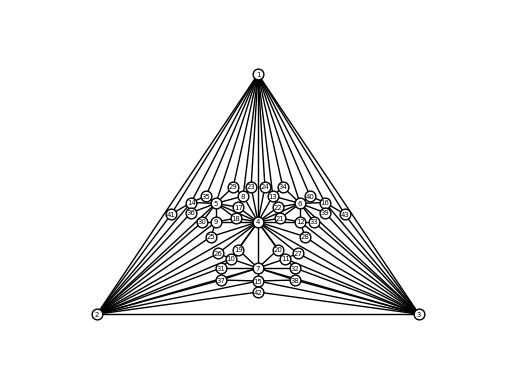

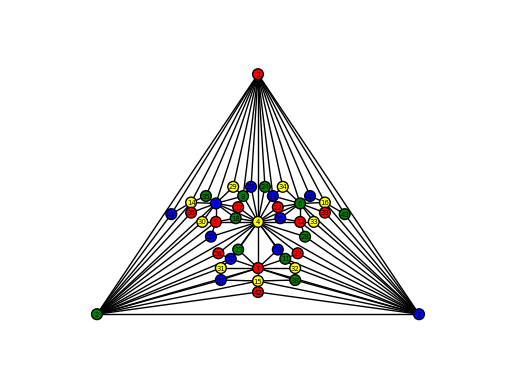

In [20]:
plotGraph(solutions, edges, False)
plotGraph(solutions, edges, True)
